In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colorbar, colors
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, InsetPosition

In [2]:
eps = np.linspace(0,1,101)
    
Nf = np.zeros(eps.size)
M = 600
TotCases = np.zeros((eps.size,M))
NewCases = np.zeros((eps.size,M))
for j in range(eps.size):
    P = np.loadtxt('data/Pop_eps={:04.2f}_NLD=30.dat'.format(eps[j]))
    TotCases[j,:] = np.sum(P[:,1:5],axis=1)[:M]
    TotCases[j,np.argmax(TotCases[j,:]):] = np.nan    

    NewCases[j,:] = np.gradient(TotCases[j,:])
    NewCases[j,np.argmax(TotCases[j,:]):] = np.nan    
    Nf[j] = np.max(TotCases[j,:])

<ipython-input-3-95e42608efac>:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('Fig4.pdf')
/home/nbudanur/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


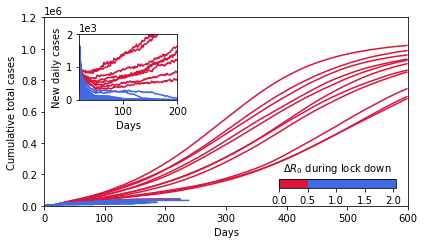

In [3]:
col1 = '#4169E1'
col2 = '#DC143C'
colmap = LinearSegmentedColormap.from_list('twocols', [(0.00, col1),
                                                       (0.76, col1),
                                                       (0.76, col2),
                                                       (1.00, col2)], N=eps.size)

colors_plot = colmap(np.arange(eps.size))

R0 = (4*eps*0.165 + 4*(1-(1-eps*0.165)**4))/1.33
N = 3162

fig, ax = plt.subplots(figsize=(6,3.5),tight_layout=True)
axi  = inset_axes(ax,width='100%',height='100%',bbox_to_anchor=(.11, .59, .27, .35),bbox_transform=ax.transAxes)
axcb = inset_axes(ax,width='100%',height='100%',bbox_to_anchor=(.66, .12, .32, 0.05),bbox_transform=ax.transAxes)
ax.set_xlim([0,600])
ax.set_ylim([0,1.2e6])
ax.set_xlabel(r'Days')
ax.set_ylabel(r'Cumulative total cases')

for j in range(1,eps.size,2):
    ax.plot(TotCases[j,:],color=colors_plot[j],zorder=-j)
    

axi.set_xlim([18,200])
axi.set_ylim([0,2000])
axi.set_xlabel(r'Days')
axi.set_ylabel(r'New daily cases')
axi.ticklabel_format(axis='y',scilimits=(0,0))

for j in range(1,eps.size,3):
    axi.plot(NewCases[j,:],color=colors_plot[j],zorder=-j)

norm = colors.Normalize(vmin=np.min(R0), vmax=np.max(R0))

cb1 = colorbar.ColorbarBase(axcb, cmap=colmap.reversed(),
                                norm=norm,
                                orientation='horizontal')
cb1.set_label(r'$\Delta R_0$ during lock down',labelpad=-44)
cb1.set_ticks([0,0.5,1,1.5,2])
ax.ticklabel_format(axis='y',scilimits=(0,0))
fig.savefig('Fig4.pdf')